<a href="https://colab.research.google.com/github/olasunkanmimariam/DS-ML-Initiative/blob/main/SCA_shooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
train = pd.read_csv("/content/drive/MyDrive/shootings.csv")

In [9]:
train

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [10]:
train.shape

(4895, 15)

In [11]:
train.describe()

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [12]:
train.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
arms_category              0
dtype: int64

From above, it can be seen that there are no null values. All columns are complete with values be it strings, integers, float etc

In [13]:
train.drop('id', axis = 1, inplace=True)

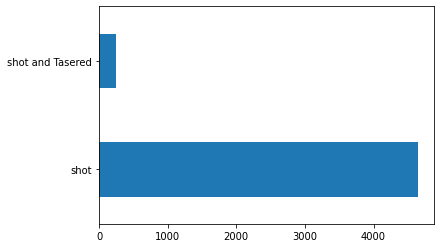

In [14]:
train['manner_of_death'].value_counts(normalize=True)
train['manner_of_death'].value_counts().plot.barh()
plt.show()

# New Section

From the above plot using horizontal bar plot, the column['manner_of_death'] has two unique values which are (shot, shot and Tasered). It can be deduce that larger number of people were shot.

In [15]:
train['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [16]:
train['threat_level'].value_counts()

attack          3160
other           1528
undetermined     207
Name: threat_level, dtype: int64

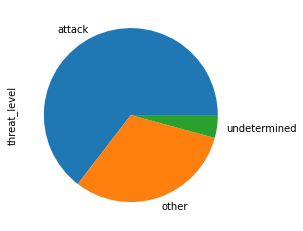

In [17]:
train['threat_level'].value_counts(normalize=True).plot.pie()

The above visualization is a pie chart showing the percentage of threat_level of people involve in the dataset. Attack has the highest percentage.

In [18]:
train['age'].value_counts()

25.0    176
31.0    174
27.0    165
33.0    164
29.0    160
       ... 
12.0      1
79.0      1
81.0      1
78.0      1
91.0      1
Name: age, Length: 76, dtype: int64

In [19]:
train.head(3)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed


In [20]:
category = pd.cut(train.age, bins=[0,2,17,65,99], labels=['Toddler','Child','Adult','Elderly'])
train.insert(4, 'age_group',category)

In [21]:
train.head()

,name,date,manner_of_death,armed,age_group,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,Adult,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,Adult,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,Adult,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,Adult,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,Adult,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [22]:
train['age_group'].value_counts()

Adult      4684
Elderly     114
Child        97
Toddler       0
Name: age_group, dtype: int64

In [23]:
pip install plotly

In [24]:
import plotly.graph_objs as go
import plotly.express as px


city = train.groupby('city')['age_group'].count().reset_index().sort_values('age_group', ascending=True).tail(50)

fig = px.bar(
    city, 
    x="age_group", 
    y="city", 
    orientation='h',
    title="Top 50 cities by deaths", 
    width=600, 
    height=700
)

fig.show()

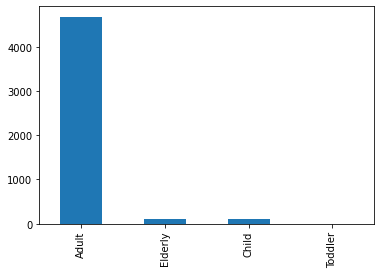

In [25]:
train['age_group'].value_counts().plot.bar()

checking the column train[age_group], it can be seen that the adult category i e those that fall between age (17-65) are far grater than others

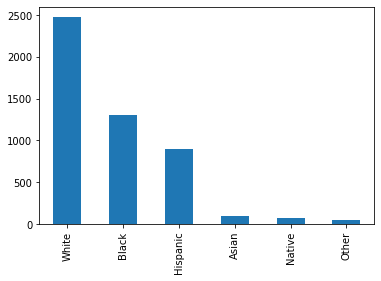

In [26]:
train['race'].value_counts().plot.bar()

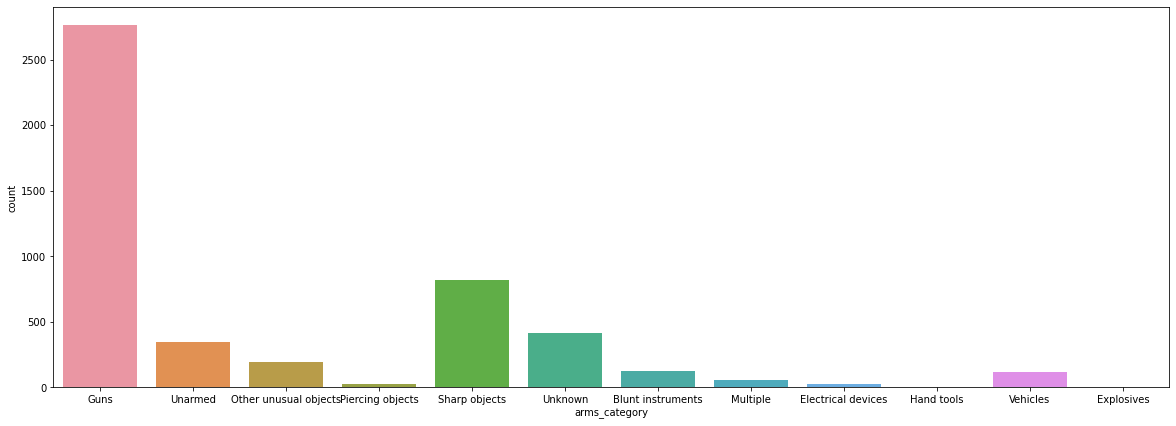

In [27]:
plt.figure(figsize=(20,7))
sns.countplot(x="arms_category", data=train)
plt.show()

In [28]:
train['arms_category'].unique()

array(['Guns', 'Unarmed', 'Other unusual objects', 'Piercing objects',
       'Sharp objects', 'Unknown', 'Blunt instruments', 'Multiple',
       'Electrical devices', 'Hand tools', 'Vehicles', 'Explosives'],
      dtype=object)

In [29]:
train.head()

,name,date,manner_of_death,armed,age_group,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,Adult,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,Adult,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,Adult,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,Adult,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,Adult,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [30]:
numerical = ['age']
booll = ['signs_of_mental_illness','body_camera']
categorical = ['manner_of_death','armed','age_group','gender','race','city','state','threat_level','flee','arms_category']
others = ['name','date']
train = train[numerical + booll + categorical + others]
train.shape

(4895, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

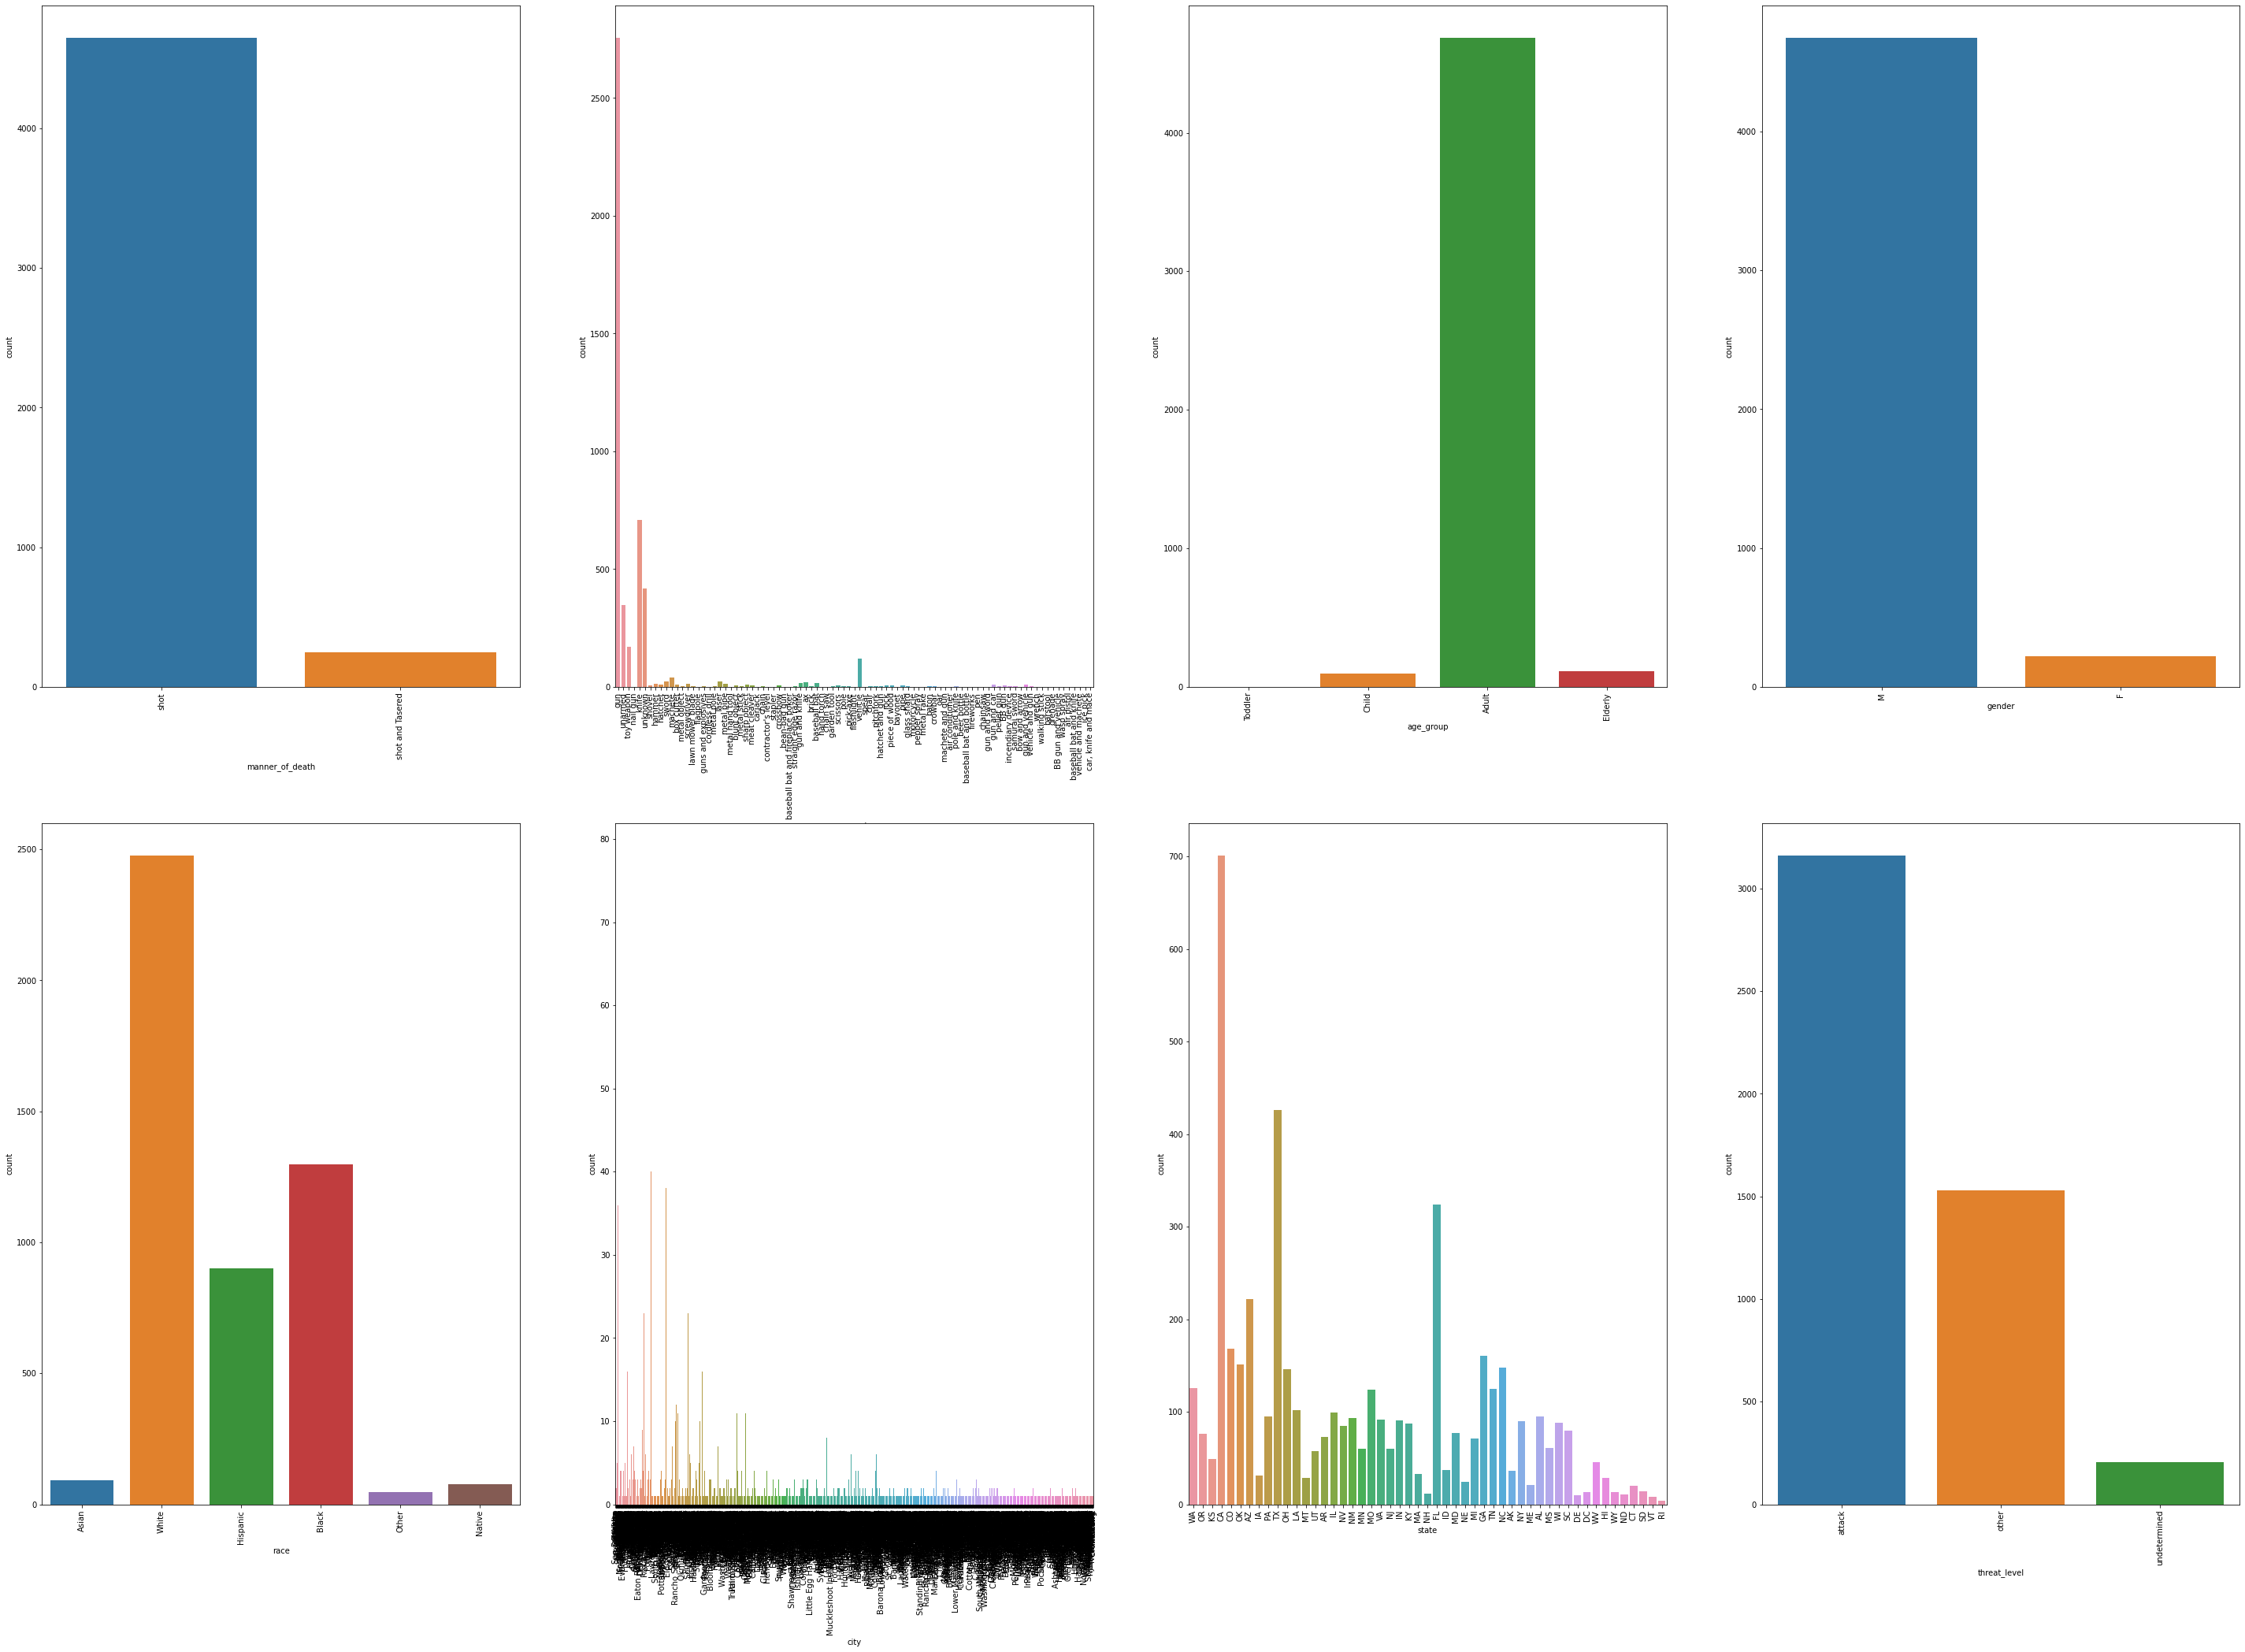

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(50, 35))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



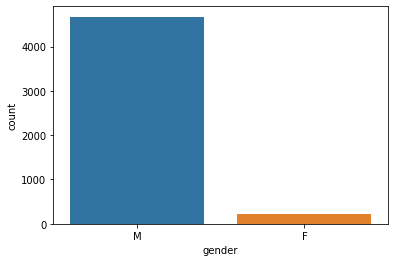

In [32]:
sns.countplot(train['gender'])

In [33]:
train.dtypes

age                         float64
signs_of_mental_illness        bool
body_camera                    bool
manner_of_death              object
armed                        object
age_group                  category
gender                       object
race                         object
city                         object
state                        object
threat_level                 object
flee                         object
arms_category                object
name                         object
date                         object
dtype: object

In [34]:
train['flee'].unique()

array(['Not fleeing', 'Car', 'Foot', 'Other'], dtype=object)

In [35]:
train = train.groupby(['flee'])['manner_of_death'].count().reset_index()

train.columns = [
    'flee', 
    'count'
]

fig = px.bar(
    train, 
    x='flee', 
    y='count', 
    orientation='v', 
    title='Flee distribution', 
    width=600
)
fig.show()

